In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ All essential libraries loaded successfully!")


✅ All essential libraries loaded successfully!


In [7]:
# --- Step 2: Load & inspect your dataset ---
import pandas as pd

data = pd.read_csv("../data/city_day.csv")   # correct path
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
# Shape of the dataset
print("Rows, Columns:", data.shape)

# Summary of columns
data.info()

# Missing values count
data.isnull().sum()


Rows, Columns: (29531, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
data.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


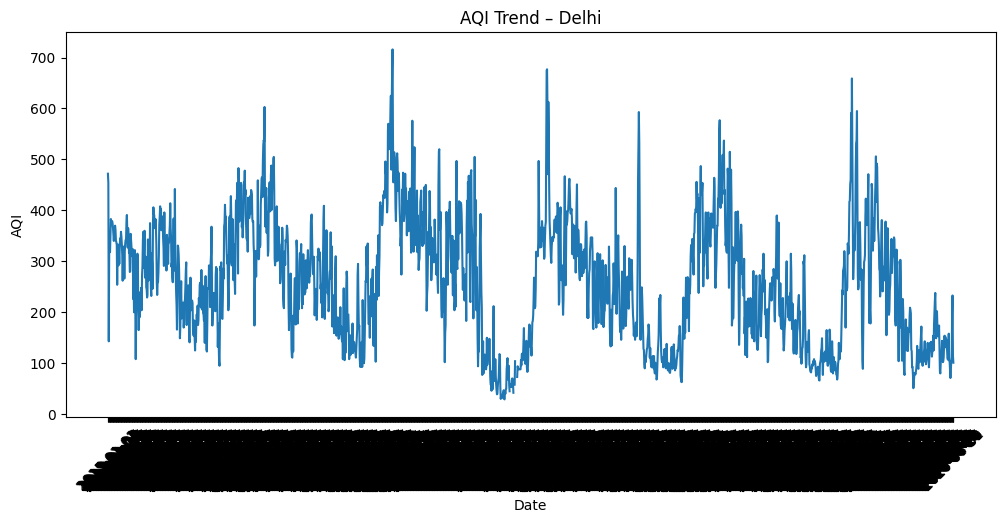

In [10]:
import matplotlib.pyplot as plt

city = "Delhi"

city_df = data[data["City"] == city]

plt.figure(figsize=(12,5))
plt.plot(city_df["Date"], city_df["AQI"])
plt.title(f"AQI Trend – {city}")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.show()



In [11]:
import seaborn as sns


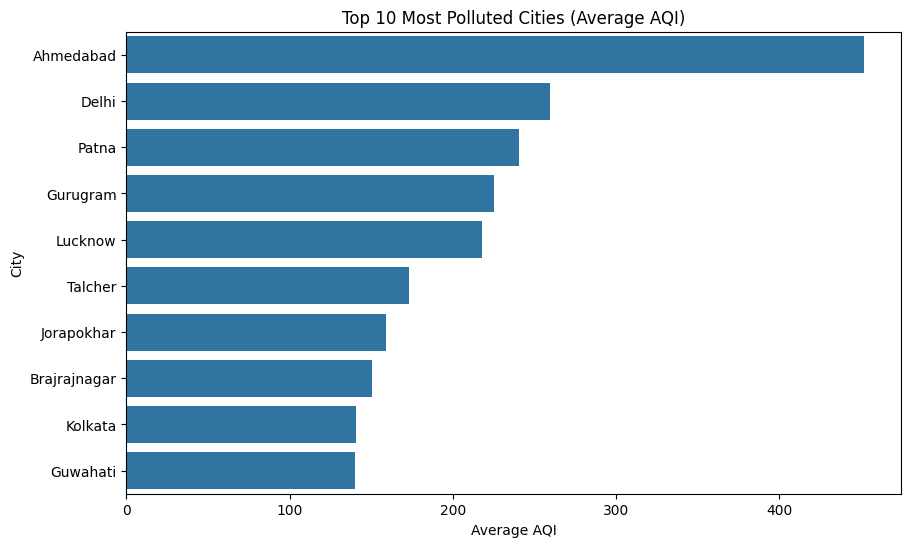

In [12]:
# Calculate average AQI per city
city_mean_aqi = data.groupby("City")["AQI"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_mean_aqi.values, y=city_mean_aqi.index)
plt.title("Top 10 Most Polluted Cities (Average AQI)")
plt.xlabel("Average AQI")
plt.ylabel("City")
plt.show()



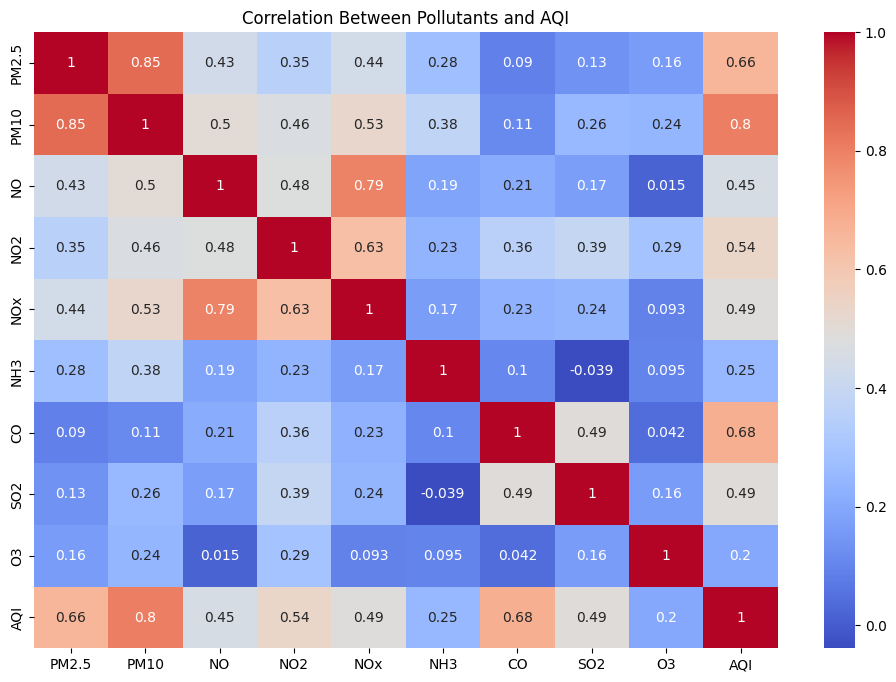

In [13]:
plt.figure(figsize=(12,8))
corr = data[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","AQI"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants and AQI")
plt.show()


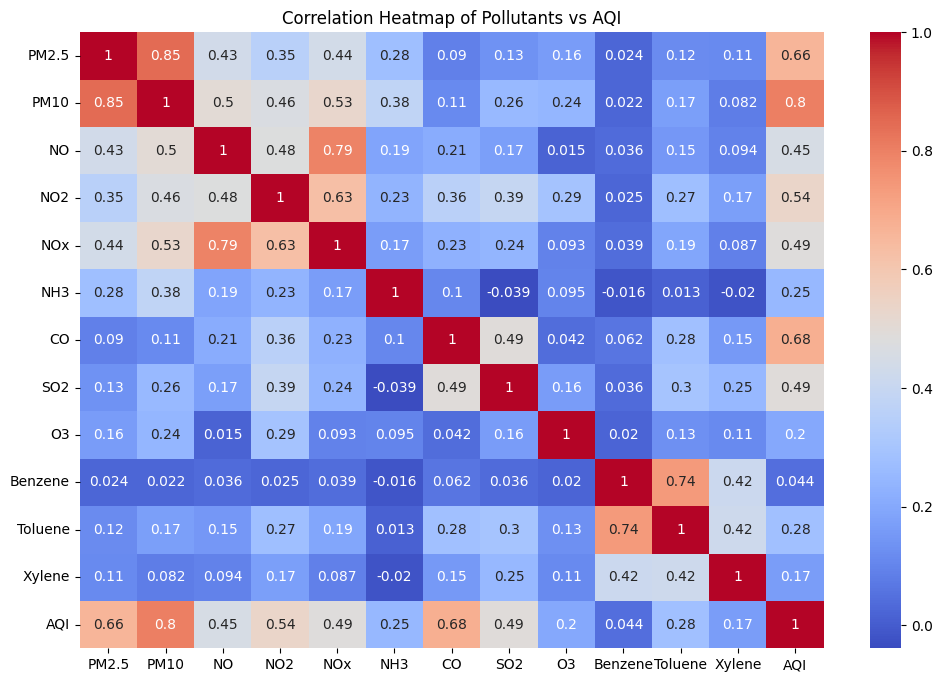

In [14]:
# --- Step 6: Correlation Analysis ---

# Select numeric pollution columns
pollution_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene", "AQI"]

corr = data[pollution_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants vs AQI")
plt.show()


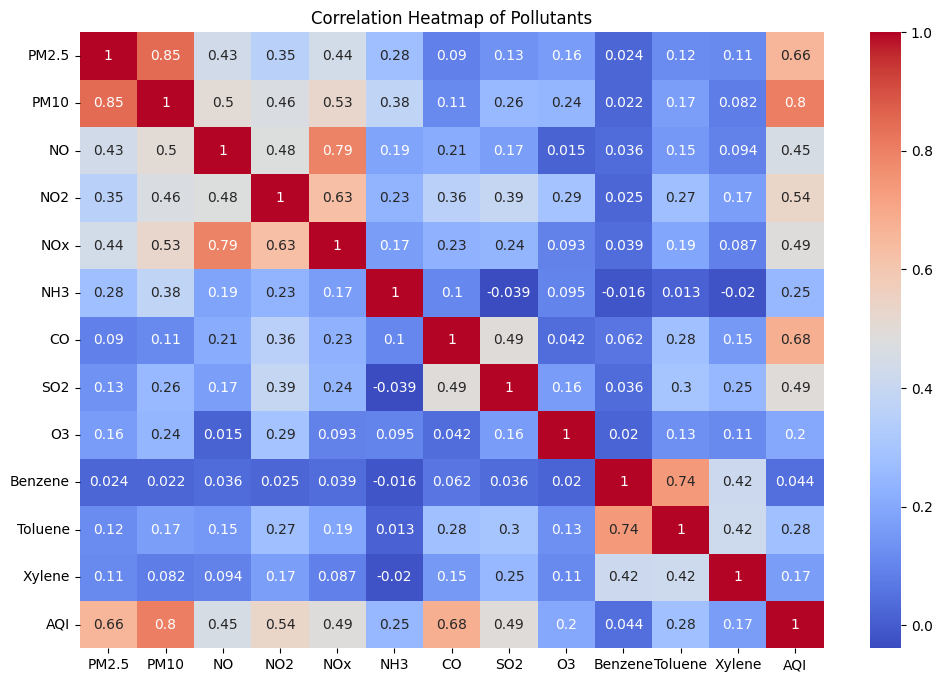

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical pollution-related columns
num_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene", "AQI"]

corr = data[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants")
plt.show()


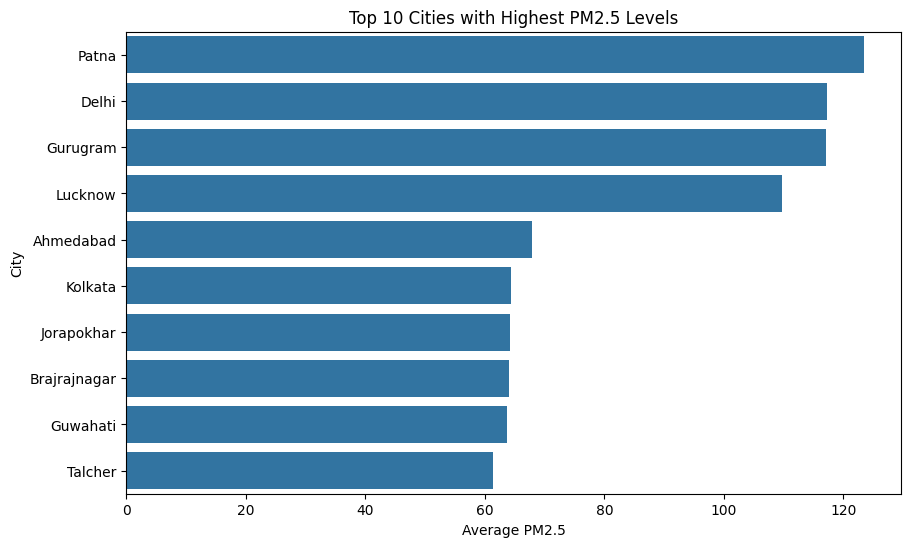

In [16]:
pollutant = "PM2.5"

city_pollution = data.groupby("City")[pollutant].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_pollution.values, y=city_pollution.index)
plt.title(f"Top 10 Cities with Highest {pollutant} Levels")
plt.xlabel(f"Average {pollutant}")
plt.ylabel("City")
plt.show()


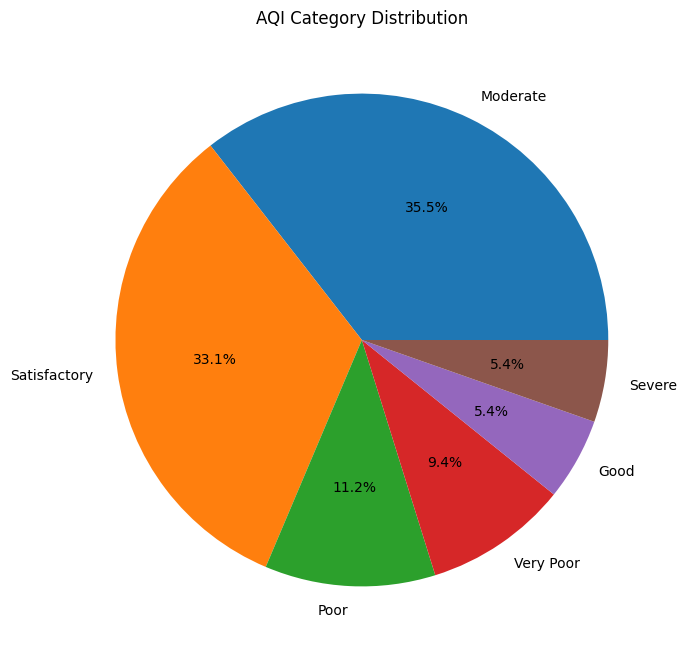

In [17]:
plt.figure(figsize=(8,8))
data["AQI_Bucket"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("AQI Category Distribution")
plt.ylabel("")
plt.show()
